In [542]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [543]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Data Cleansing

In [544]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [545]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [546]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [547]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [548]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Set các giá trị NaN thành 0

In [549]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
    df[x] = df[x].fillna(0)

df[df.columns[-1]] = df[df.columns[-1]].fillna(0)
df = df.drop([df.columns[i] for i in range(0,2)], axis=1)
print(df)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
       PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0       0.00   0.00   0.92  18.22  17.15   0.00   0.92  27.64  133.36   
1       0.00   0.00   0.97  15.69  16.46   0.00   0.97  24.55   34.06   
2       0.00   0.00  17.40  19.30  29.70   0.00  17.40  29.07   30.70   
3       0.00   0.00   1.70  18.48  17.97   0.00   1.70  18.59   36.08   
4       0.00   0.00  22.10  21.42  37.76   0.00  22.10  39.33   39.31   
...      ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530  15.00  66.00   0.40  26.85  14.05  

# Thay các giá trị String của cột AQI_Bucket thành các giá trị One-Hot

In [550]:
df = df.drop(df.columns[-1], axis = 1)
lastCol = df.columns[-1] 

# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0
df = df[df.AQI != 0] 
 
categorical_vars = [lastCol]

y = df[categorical_vars]
X = df[[df.columns[i] for i in range(0,12)]]  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train
y_train

(16649, 12) (8201, 12) (16649, 1) (8201, 1)


,AQI
10337,406.0
12742,708.0
1152,460.0
14882,188.0
3873,120.0
...,...
12360,101.0
19538,54.0
6173,81.0
13806,98.0


In [551]:

# one_hot_encoder = OneHotEncoder(sparse_output=False, drop = "first")

# y_train = one_hot_encoder.fit_transform(y_train)
# y_test = one_hot_encoder.fit_transform(y_test)

# y_train

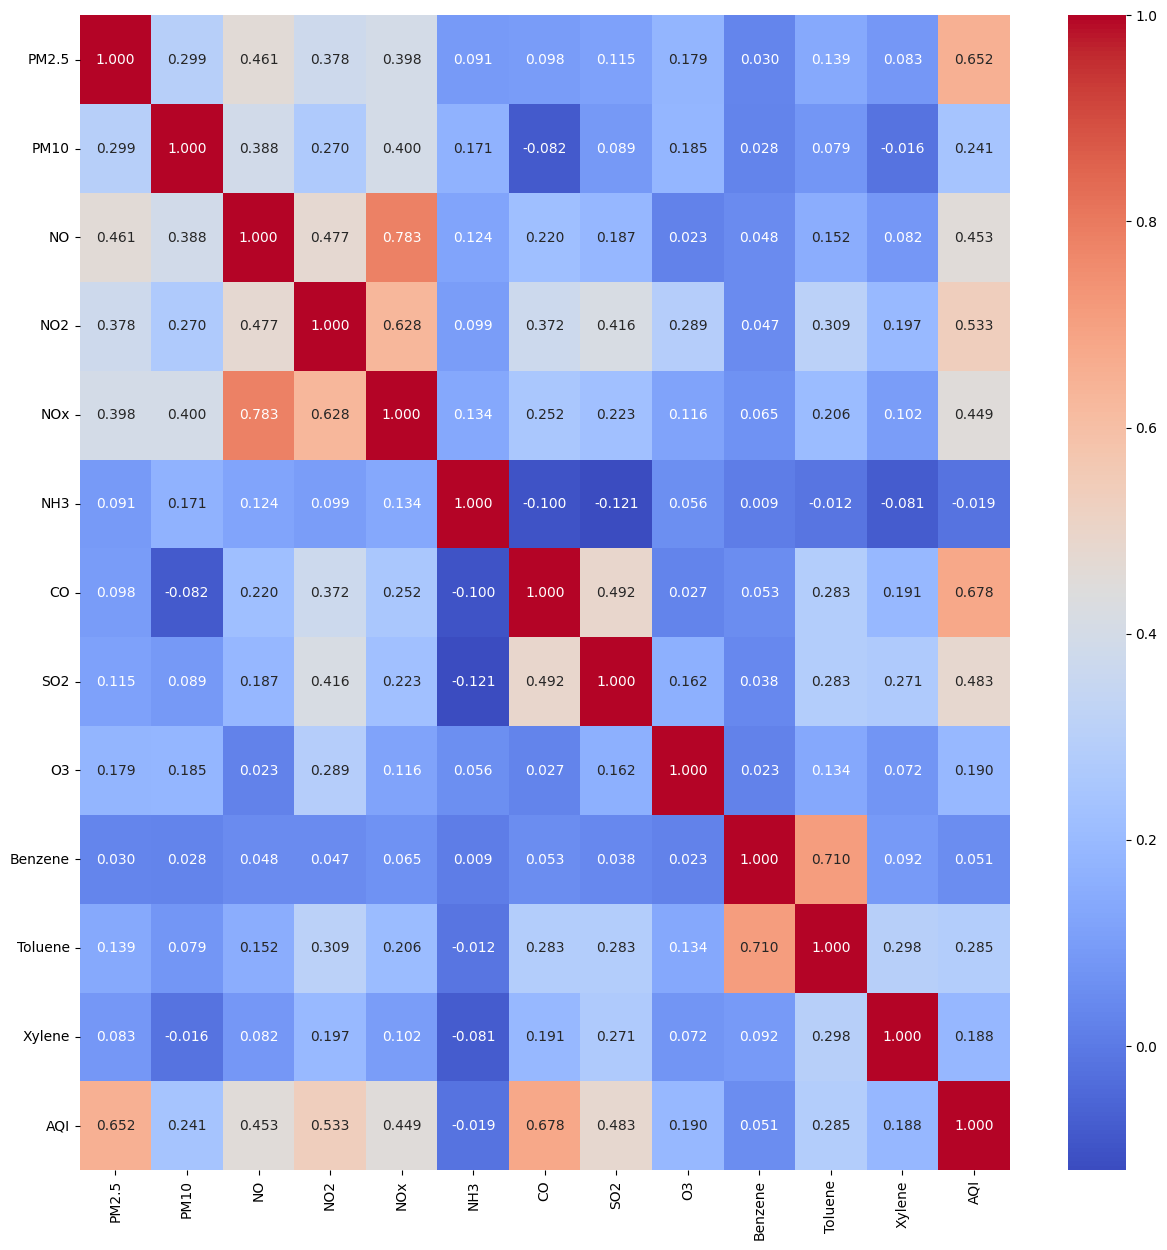

In [552]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df.columns, yticklabels=df.columns)
figure= plt.gcf()
figure.set_size_inches(15,15)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [553]:
corr_matrix.unstack().sort_values().drop_duplicates()

NH3      SO2       -0.120724
CO       NH3       -0.100337
         PM10      -0.082063
NH3      Xylene    -0.081009
AQI      NH3       -0.018702
                      ...   
         PM2.5      0.651809
CO       AQI        0.677645
Benzene  Toluene    0.709668
NOx      NO         0.783144
PM2.5    PM2.5      1.000000
Length: 79, dtype: float64

In [555]:
model = LinearRegression()
model.fit(X_train, y_train )
y_pr = pd.DataFrame(model.predict(X_test))


# y_test_arg=np.argmax(y_test,axis=1)
# Y_pred = np.argmax(model.predict(X_test),axis=1)

accuracy = accuracy_score(y_test, y_pr)
print('Accuracy: %.2f' % (accuracy*100)) 

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class MyLinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


In [ ]:
model2 = MyLinearRegression()
model2.fit(X_train, y_train)

ValueError: Unable to coerce to Series, length must be 1: given 16649